## Logistic Regression on Admission Prediction Dataset (available on kaggle)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [6]:
# a) Import Admission_Predict dataset, display it, visualize various columns
admission_data = pd.read_csv('Admission_Predict.csv')
print(admission_data.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


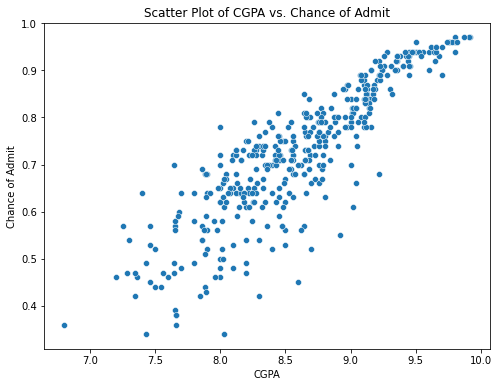

In [7]:
# b) Plot the dataset on CGPA vs. Chance of Admit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CGPA', y='Chance of Admit ', data=admission_data)
plt.title('Scatter Plot of CGPA vs. Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.show()

In [8]:
# c) Convert 'Chance of Admit' to binary classes
threshold = 0.5
admission_data['Admitted'] = (admission_data['Chance of Admit '] > threshold).astype(int)
print(admission_data[['Chance of Admit ', 'Admitted']])

     Chance of Admit   Admitted
0                0.92         1
1                0.76         1
2                0.72         1
3                0.80         1
4                0.65         1
..                ...       ...
395              0.82         1
396              0.84         1
397              0.91         1
398              0.67         1
399              0.95         1

[400 rows x 2 columns]


In [9]:
# d) Find the slope and intercept of the line to fit
X = admission_data[['CGPA']]
y = admission_data['Admitted']
model = LogisticRegression()
model.fit(X, y)

slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Slope: {slope}, Intercept: {intercept}")

Slope: 3.3620030266174252, Intercept: -25.26029497892227


In [10]:
# e) Compute the log odds for each entry. Merge the results with the data as a new column
log_odds = model.predict_log_proba(X)[:, 1]
admission_data['log_odds'] = log_odds
print(admission_data[['CGPA', 'Admitted', 'log_odds']])

     CGPA  Admitted  log_odds
0    9.65         1 -0.000759
1    8.87         1 -0.010401
2    8.00         1 -0.177987
3    8.67         1 -0.020274
4    8.21         1 -0.091812
..    ...       ...       ...
395  9.04         1 -0.005886
396  9.11         1 -0.004655
397  9.45         1 -0.001486
398  8.78         1 -0.014050
399  9.66         1 -0.000734

[400 rows x 3 columns]


In [14]:
# f) Using the log odds compute the probability for each entry
admission_data['probability'] = 1 / (1 + np.exp(-log_odds))
print(admission_data[['CGPA', 'Admitted', 'log_odds', 'probability']])

     CGPA  Admitted  log_odds  probability
0    9.65         1 -0.000759     0.499810
1    8.87         1 -0.010401     0.497400
2    8.00         1 -0.177987     0.455620
3    8.67         1 -0.020274     0.494932
4    8.21         1 -0.091812     0.477063
..    ...       ...       ...          ...
395  9.04         1 -0.005886     0.498528
396  9.11         1 -0.004655     0.498836
397  9.45         1 -0.001486     0.499628
398  8.78         1 -0.014050     0.496488
399  9.66         1 -0.000734     0.499817

[400 rows x 4 columns]


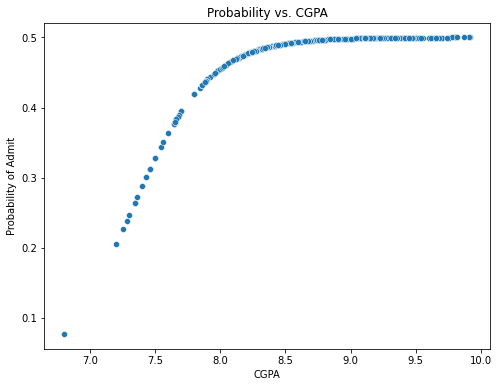

In [12]:
# g) Plot the probabilities vs CGPA graph
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CGPA', y='probability', data=admission_data)
plt.title('Probability vs. CGPA')
plt.xlabel('CGPA')
plt.ylabel('Probability of Admit')
plt.show()

In [13]:

# h) Show the accuracy of the regressor model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {accuracy_train}")
print(f"Testing Accuracy: {accuracy_test}")

Training Accuracy: 0.934375
Testing Accuracy: 0.8625


## Logistic Regression on Credit Card Dataset (available on kaggle)

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [25]:
#a) Load the dataset, visualize it, show the data headers
import pandas as pd
credit_card_data = pd.read_csv('creditcard.csv')
print(credit_card_data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [26]:
#b) Preprocess the dataset
# i. Check duplicate data. If found, remove it.
credit_card_data = credit_card_data.drop_duplicates()

# ii. Remove columns which are not important. For example: Time
credit_card_data = credit_card_data.drop(['Time'], axis=1)

# iii. Separate the dataset into feature column and target column.
# The 'Class' column is the target column, and everything else is a feature
X = credit_card_data.drop(['Class'], axis=1)
y = credit_card_data['Class']

# iv. Scale the dataset using standard scaling mechanism.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# v. Partition dataset into training and testing set as 80%-20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


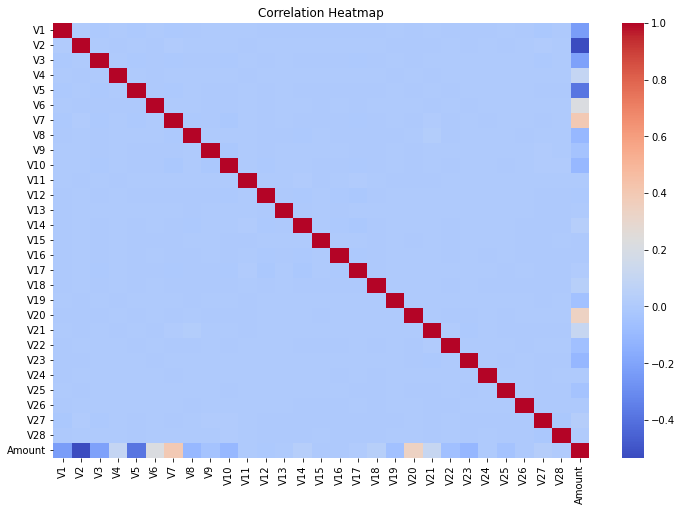

In [18]:
#c) Plot histograms/heatmaps to understand the values of each variable.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


In [19]:
#d) Train the model using logistic regression.
from sklearn.linear_model import LogisticRegression

model_credit_card = LogisticRegression()
model_credit_card.fit(X_train, y_train)


LogisticRegression()

In [20]:
#e) Obtain the training accuracy.
from sklearn.metrics import accuracy_score

y_pred_train_credit_card = model_credit_card.predict(X_train)
accuracy_train_credit_card = accuracy_score(y_train, y_pred_train_credit_card)
print(f"Training Accuracy: {accuracy_train_credit_card}")


Training Accuracy: 0.9991937615648956


In [21]:
#f) Test the model. Obtain the testing accuracy.
y_pred_test_credit_card = model_credit_card.predict(X_test)
accuracy_test_credit_card = accuracy_score(y_test, y_pred_test_credit_card)
print(f"Testing Accuracy: {accuracy_test_credit_card}")


Testing Accuracy: 0.9991717477883904


In [22]:
# g) Generate confusion matrix, precision, and recall based on TP, FP, FN, TN.
from sklearn.metrics import confusion_matrix, precision_score, recall_score

conf_matrix = confusion_matrix(y_test, y_pred_test_credit_card)
precision = precision_score(y_test, y_pred_test_credit_card)
recall = recall_score(y_test, y_pred_test_credit_card)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Confusion Matrix:
[[56650     6]
 [   41    49]]
Precision: 0.8909090909090909
Recall: 0.5444444444444444
